##  Coffee Lovers Unite!
If caffeine is one of the most popular drugs, then coffee is likely one of the most popular delivery systems for it. Aside from caffeine, people enjoy the wonderful variety of coffee-related drinks. Let’s do a rough investigation of the “market share” by two of the top coffee chains in the United States!

World Population Review provides some great data on store locations and chain prevalence. Check out this page (https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state) for the Starbucks Coffee locations in the United States. Notice that this page only really gives the name of the state and the number of locations in that state.

In [81]:
# Package Dependecies
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup
import pandas as pd
from plotnine import *

## Scrape the Location Counts

--- 

1. Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:

- Starbucks
- Dunkin’ Donuts

2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [82]:
# URL for Starbucks data
sbux_url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"

# Fetch the page content
response = requests.get(sbux_url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the data
table = soup.find("table", {"class": "wpr-table"})

# Initialize a list to store the data
rows = []

# Loop through each row in the table's tbody
for row in table.find("tbody").find_all("tr"):
    # Extract the state name from the <th> tag
    state_name = row.find("th").get_text(strip=True)
    
    # Extract the store counts for 2023, 2021, and 2024
    columns = row.find_all("td")
    stores_2023 = int(columns[0].get_text(strip=True).replace(",", "")) if columns[0].get_text(strip=True) else None
    stores_2021 = int(columns[1].get_text(strip=True).replace(",", "")) if columns[1].get_text(strip=True) else None
    stores_2024 = int(columns[2].get_text(strip=True).replace(",", "")) if columns[2].get_text(strip=True) else None

    # Append the extracted data to the 'rows' list
    rows.append([state_name, stores_2023, stores_2021, stores_2024])

# Convert to DataFrame
starbucks_df = pd.DataFrame(rows, columns=["State", "2023", "2021", "2024"])

# Since 2024 data is likely to be close to 2023 data, fill unknowns with 2023!
starbucks_df['2024'].fillna(starbucks_df['2023'], inplace=True)

starbucks_df.head()

,State,2023,2021,2024
0,California,3080,2959.0,3117.0
1,Texas,1346,1215.0,1409.0
2,Florida,844,786.0,892.0
3,Washington,741,739.0,736.0
4,New York,692,643.0,715.0


In [83]:
# URL for Dunkin' Donuts data
dunkin_url = "https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state"

# Fetch the page content
response = requests.get(dunkin_url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the Dunkin' table
table = soup.find("table", {"class": "wpr-table"})

rows = []  # To store each row's data

# Loop through each row in the table's tbody
for row in table.find("tbody").find_all("tr"):
    state_name = row.find("th").get_text(strip=True)
    columns = row.find_all("td")
    
    # Assign values for years with conditional checks to avoid index errors
    stores_2024 = int(columns[0].get_text(strip=True).replace(",", "")) if len(columns) > 0 and columns[0].get_text(strip=True) else None
    stores_2023 = int(columns[1].get_text(strip=True).replace(",", "")) if len(columns) > 1 and columns[1].get_text(strip=True) else None
    
    # Append data to the rows list
    rows.append([state_name, stores_2024, stores_2023])

# Convert to DataFrame with specific column names
dunkin_df = pd.DataFrame(rows, columns=["State", "2024", "2023"])

dunkin_df.head()

,State,2024,2023
0,New York,1431,1414.0
1,Massachusetts,1042,1068.0
2,Florida,909,883.0
3,New Jersey,872,866.0
4,Illinois,711,692.0


In [84]:
# Melt Starbucks data with a Store label
starbucks_long = starbucks_df.melt(id_vars=["State"], var_name="Year", value_name="Store_Count")
starbucks_long["Store"] = "Starbucks"

# Melt Dunkin' Donuts data with a Store label
dunkin_long = dunkin_df.melt(id_vars=["State"], var_name="Year", value_name="Store_Count")
dunkin_long["Store"] = "Dunkin' Donuts"

# Concatenate both datasets
coffee_df = pd.concat([starbucks_long, dunkin_long], ignore_index=True)
coffee_df['Year'] = coffee_df['Year'].astype(int)


coffee_df.head()

,State,Year,Store_Count,Store
0,California,2023,3080.0,Starbucks
1,Texas,2023,1346.0,Starbucks
2,Florida,2023,844.0,Starbucks
3,Washington,2023,741.0,Starbucks
4,New York,2023,692.0,Starbucks


Supplemental Data
--- 

4. Scrape the state names and populations from this wikipedia page(https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population). Merge these data with your coffee dataset.

5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

6. Create a region variable in your dataset according to the scheme on this wikipedia page (https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States) : Northeast, Midwest, South, West. You do not need to scrape this information.

### Part 4:

In [85]:
# URL for the Wikipedia page
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table and extract rows
table = soup.find("table", {"class": "wikitable"})
rows = table.find_all("tr")[1:]  # Skip the header row

# Extract state names and populations
population_data = []
for row in rows:
    cols = row.find_all("td")
    state = cols[2].get_text(strip=True)  # State name
    population_2020 = int(cols[3].get_text(strip=True).replace(",", ""))  # 2020 Census population
    
    population_data.append([state, population_2020])

population_df = pd.DataFrame(population_data, columns=["State", "Population_2020"])

population_df.head()

,State,Population_2020
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [86]:
# Merge coffee data with population data on the 'State' column
merged_df = coffee_df.merge(population_df, on="State", how="left")

merged_df.head()

,State,Year,Store_Count,Store,Population_2020
0,California,2023,3080.0,Starbucks,39538223
1,Texas,2023,1346.0,Starbucks,30145505
2,Florida,2023,844.0,Starbucks,21538187
3,Washington,2023,741.0,Starbucks,7705281
4,New York,2023,692.0,Starbucks,20201249


### Part 5:

Sources:

- https://www.statista.com/statistics/919774/sales-of-selected-leading-coffee-house-and-cafe-chains-in-the-us/#:~:text=Leading%20coffee%20shop%20chain%20sales%20in%20the%20U.S.%202023&text=In%202023%2C%20the%20leading%20coffee,billion%20U.S.%20dollars%20in%20sales.
- https://www.zippia.com/dunkin-donuts-careers-554008/revenue/
- https://www.enterpriseappstoday.com/stats/dunkin-statistics.html
- https://companiesmarketcap.com/starbucks/revenue/
- https://companiesmarketcap.com/dunkin-brands/revenue/


In [87]:
url_sbux = "https://companiesmarketcap.com/starbucks/revenue/"
url_dunkin = "https://companiesmarketcap.com/dunkin-brands/revenue/"

In [88]:
# Starbucks revenue extraction
response = requests.get(url_sbux)
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the revenue table and skip the header row
table = soup.find("table", {"class": "table"})
rows = table.find_all("tr")[1:]  # Skipping header row

# Extracting year and revenue data
data_sbux = []
for row in rows:
    year = row.find_all("td")[0].get_text(strip=True)[:4]  # Extracting the year only
    revenue = row.find_all("td")[1].get_text(strip=True).replace('$', '').replace('B', '').replace(',', '')
    data_sbux.append([year, revenue])

# Creating DataFrame and converting revenue to full dollar amount
df_sbux = pd.DataFrame(data_sbux, columns=["Year", "Revenue ($Billion)"])
df_sbux["Revenue ($Billion)"] = df_sbux["Revenue ($Billion)"].astype(float) # Converting from billions to full dollar amount
df_sbux["Year"] = df_sbux["Year"].astype(int)

# Adding a column for Starbucks to differentiate in merged data
df_sbux["Store"] = "Starbucks"
df_sbux.head()

,Year,Revenue ($Billion),Store
0,2024,36.47,Starbucks
1,2023,36.68,Starbucks
2,2022,32.91,Starbucks
3,2021,30.36,Starbucks
4,2020,23.17,Starbucks


In [89]:
# Dunkin' revenue extraction
response = requests.get(url_dunkin)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find("table", {"class": "table"})
rows = table.find_all("tr")[1:]  # Skipping header row

data_dunkin = []
for row in rows:
    year = row.find_all("td")[0].get_text(strip=True)[:4]  # Grabbing the year only
    revenue = row.find_all("td")[1].get_text(strip=True).replace('$', '').replace('B', '').replace(',', '')
    data_dunkin.append([year, revenue])

df_dunkin = pd.DataFrame(data_dunkin, columns=["Year", "Revenue ($Billion)"])
df_dunkin["Revenue ($Billion)"] = df_dunkin["Revenue ($Billion)"].astype(float)  # Converting from billions to full dollar amount

# Adding a column for Dunkin' to differentiate in merged data
df_dunkin["Store"] = "Dunkin' Donuts"
# Add 2022, 2023, and 2024 data from online sources:

# Known revenue for Dunkin' Donuts in 2023
known_revenue_2023 = 1.4  # 11.9 billion

# Assumed annual growth rate (estimate based on trends sources above)
growth_rate = 0.04  # 4%

# Estimate revenue for 2022, 2021, and 2024 by applying the growth rate
rev_2021 = {"Year": 2021, "Revenue ($Billion)": known_revenue_2023 / ((1 + growth_rate) ** 2), "Store": "Dunkin' Donuts"}
rev_2022 = {"Year": 2022, "Revenue ($Billion)": known_revenue_2023 / (1 + growth_rate), "Store": "Dunkin' Donuts"}
rev_2024 = {"Year": 2024, "Revenue ($Billion)": known_revenue_2023 * (1 + growth_rate), "Store": "Dunkin' Donuts"}
rev_2023 = {"Year": 2023, "Revenue ($Billion)": known_revenue_2023, "Store": "Dunkin' Donuts"}

# Create DataFrame and add to existing data
estimated_revenues = pd.DataFrame([rev_2021, rev_2022, rev_2023, rev_2024])

df_dunkin = pd.concat([df_dunkin, estimated_revenues], ignore_index=True)

df_dunkin["Year"] = df_dunkin["Year"].astype(int)
df_dunkin.tail()

,Year,Revenue ($Billion),Store
9,2011,0.620000,Dunkin' Donuts
10,2021,1.294379,Dunkin' Donuts
11,2022,1.346154,Dunkin' Donuts
12,2023,1.400000,Dunkin' Donuts
13,2024,1.456000,Dunkin' Donuts


In [90]:
# Concatenate Starbucks and Dunkin' revenue DataFrames
df_revenue = pd.concat([df_sbux, df_dunkin], ignore_index=True)
df_revenue.head()

,Year,Revenue ($Billion),Store
0,2024,36.47,Starbucks
1,2023,36.68,Starbucks
2,2022,32.91,Starbucks
3,2021,30.36,Starbucks
4,2020,23.17,Starbucks


In [91]:
final_merged_df = merged_df.merge(df_revenue, on=["Year", "Store"], how="left")

final_merged_df.head()

,State,Year,Store_Count,Store,Population_2020,Revenue ($Billion)
0,California,2023,3080.0,Starbucks,39538223,36.68
1,Texas,2023,1346.0,Starbucks,30145505,36.68
2,Florida,2023,844.0,Starbucks,21538187,36.68
3,Washington,2023,741.0,Starbucks,7705281,36.68
4,New York,2023,692.0,Starbucks,20201249,36.68


### Part 6:

In [92]:
# State-region mapping dict based on the Wikipedia regions
state_to_region = {
    # Northeast
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Northeast", "New York": "Northeast", "Pennsylvania": "Northeast",

    # Midwest
    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest", "Ohio": "Midwest",
    "Wisconsin": "Midwest", "Iowa": "Midwest", "Kansas": "Midwest", "Minnesota": "Midwest",
    "Missouri": "Midwest", "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",

    # South
    "District of Columbia": "South", "Delaware": "South", "Florida": "South", "Georgia": "South", "Maryland": "South",
    "North Carolina": "South", "South Carolina": "South", "Virginia": "South", "West Virginia": "South",
    "Alabama": "South", "Kentucky": "South", "Mississippi": "South", "Tennessee": "South",
    "Arkansas": "South", "Louisiana": "South", "Oklahoma": "South", "Texas": "South",

    # West
    "Arizona": "West", "Colorado": "West", "Idaho": "West", "Montana": "West", 
    "Nevada": "West", "New Mexico": "West", "Utah": "West", "Wyoming": "West",
    "Alaska": "West", "California": "West", "Hawaii": "West", "Oregon": "West", 
    "Washington": "West"
}

# Map each state to its region
final_merged_df['Region'] = final_merged_df['State'].map(state_to_region)

final_merged_df.head()

,State,Year,Store_Count,Store,Population_2020,Revenue ($Billion),Region
0,California,2023,3080.0,Starbucks,39538223,36.68,West
1,Texas,2023,1346.0,Starbucks,30145505,36.68,South
2,Florida,2023,844.0,Starbucks,21538187,36.68,South
3,Washington,2023,741.0,Starbucks,7705281,36.68,West
4,New York,2023,692.0,Starbucks,20201249,36.68,Northeast


## Analyze

---

7. Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):

- Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states.

- How does your chosen financial metric change by state and region for each chain? For example, having 5 stores in California is very different from having 5 stores in Wyoming.

- Does the distribution of each chain’s stores match population distribution, by both state/region?

- Do the financial data match what you’d expect based on the number and locations of the stores? Why or why not?

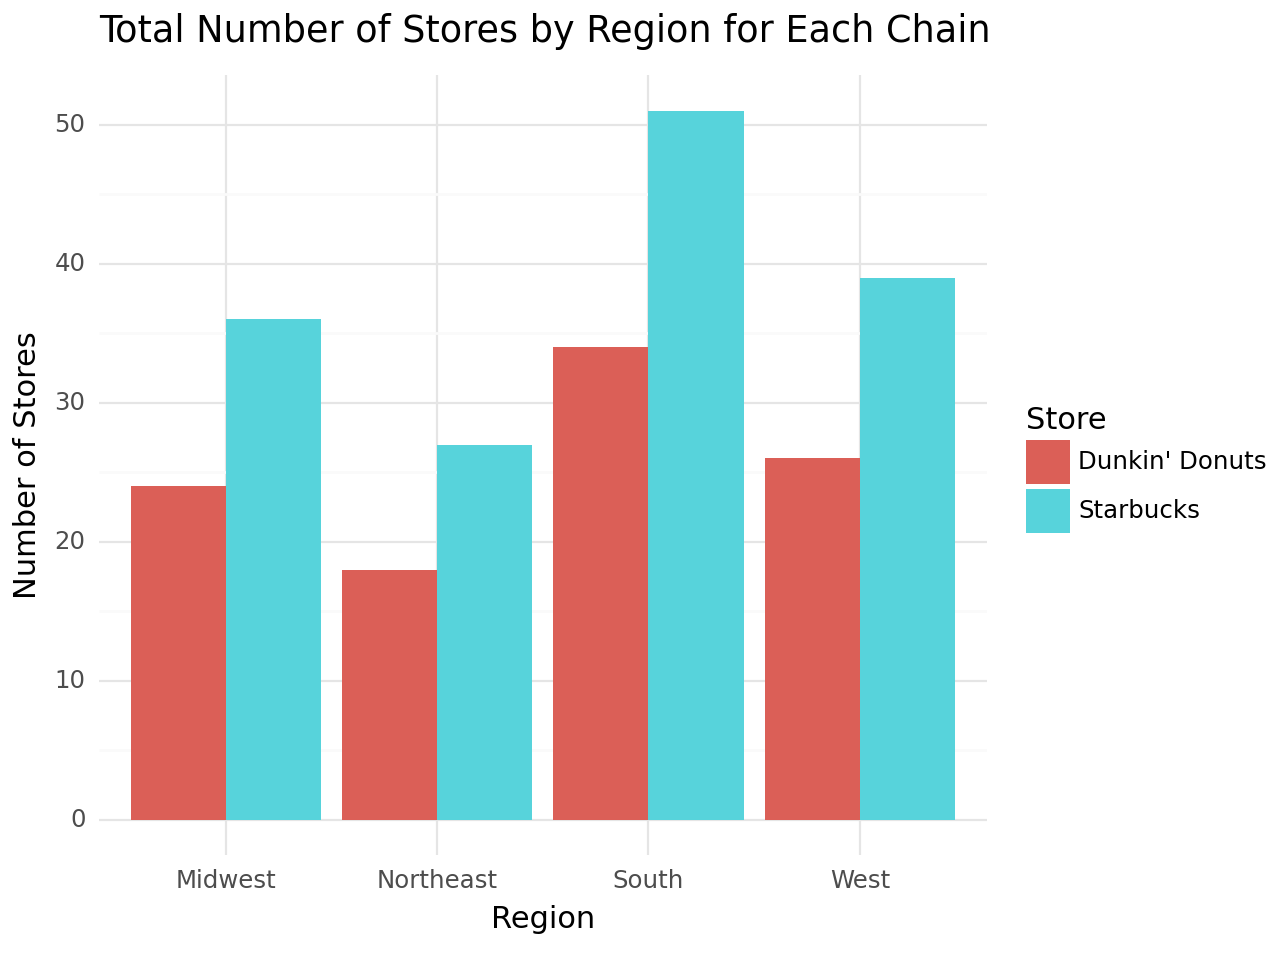

<Figure Size: (640 x 480)>

In [93]:
# Chain Prevalence by Region
chain_prevalence_region = (
    ggplot(final_merged_df, aes(x='Region', fill='Store')) +
    geom_bar(position="dodge") +
    labs(title="Total Number of Stores by Region for Each Chain",
         x="Region", y="Number of Stores") +
    theme_minimal()
)

# Store Count Relative to Population by State
final_merged_df['Stores_per_100k'] = final_merged_df['Store_Count'] / (final_merged_df['Population_2020'] / 100000)

store_density_population = (
    ggplot(final_merged_df, aes(x='Stores_per_100k', y='Population_2020', color='Store')) +
    geom_point(alpha=0.7) +
    labs(title="Store Density Relative to State Populations",
         x="Stores per 100k People", y="Population") +
    theme_minimal()
)

# Store Count by State and Region
store_count_region = (
    ggplot(final_merged_df, aes(x='reorder(State, Store_Count)', y='Store_Count', fill='Store')) +
    geom_col() +
    labs(title="Store Count by State within Each Region",
         x="State", y="Store Count") +
    facet_wrap('~Region', scales='free') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=90))
)

chain_prevalence_region

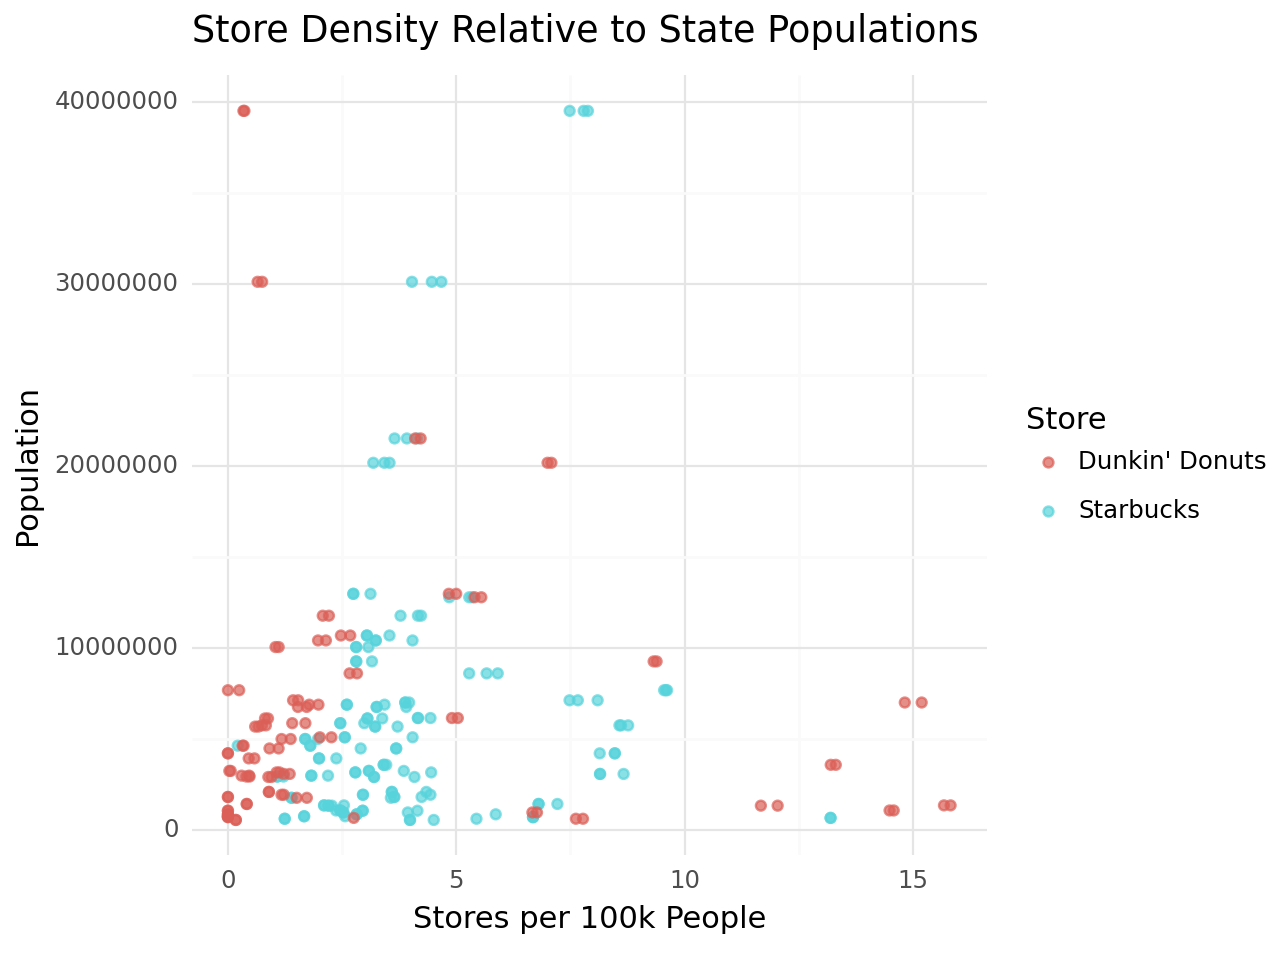

<Figure Size: (640 x 480)>

In [94]:
store_density_population

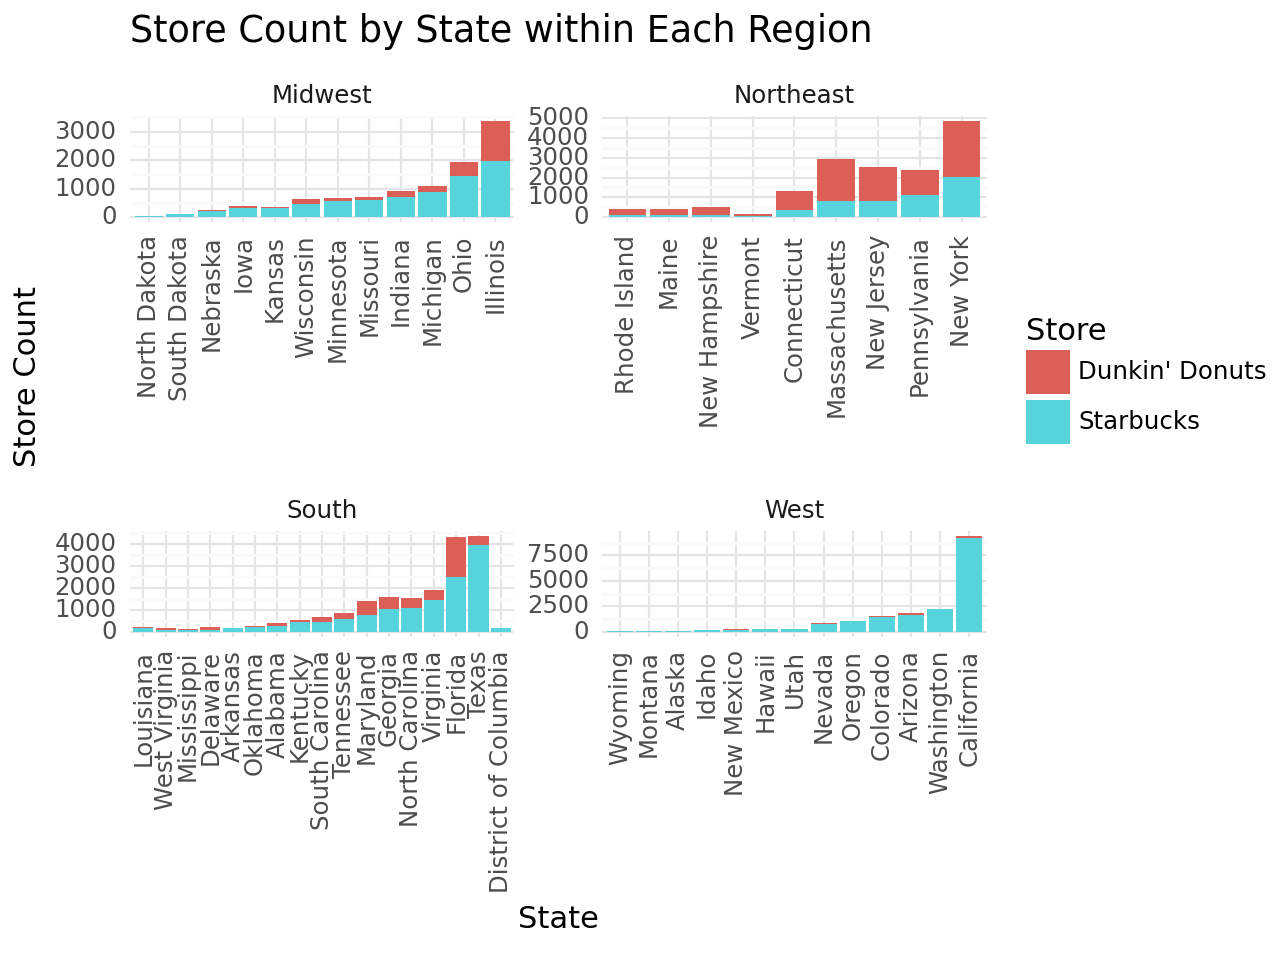

<Figure Size: (640 x 480)>

In [95]:
store_count_region

The bar chart showing the total number of stores by region illustrates the stronger overall presence of Starbucks across all regions, especially in the South and West. Starbucks has a significant lead over Dunkin' in these regions, which could be attributed to the brand’s focus on a broader geographic reach and appeal to diverse demographic segments. For instance, Starbucks has a prominent presence in highly populated states like California and Texas within the West and South, respectively. Dunkin' Donuts, in contrast, has a particularly strong concentration in the Northeast. Here, states like New York and Massachusetts show a dense network of Dunkin' stores, reflecting the brand's origin and its stronger cultural alignment with this region.

The scatter plot comparing store density relative to state populations provides a closer look at how store availability correlates with population size. Dunkin' Donuts appears to have higher store density in smaller, more densely populated states, particularly in the Northeast, where the brand has established itself as a staple. For example, states like Massachusetts and New York show high numbers of Dunkin' locations relative to their populations, indicating a high demand concentration. Conversely, Starbucks shows a more balanced distribution across both low- and high-density areas, with a notable presence in large states with varying population sizes, such as California and Washington.

The faceted chart depicting store counts by state within each region further reinforces these regional patterns. In the Northeast, Dunkin' Donuts dominates states like Massachusetts and New York, outnumbering Starbucks significantly. This contrasts with the West, where Starbucks has a significant lead, especially in California, indicating a more widespread acceptance and brand penetration in this region. This chart also highlights Dunkin's relatively minimal presence in the Western states, reflecting the company’s more localized strategy centered around the Eastern U.S. In the South, both chains show a moderate presence, although Starbucks remains the more dominant brand overall in states like Florida.

These findings suggest that while Starbucks has achieved a more uniform national presence, Dunkin's strategy has been highly concentrated in the Northeast. Starbucks’ broader store distribution aligns with its appeal to various urban and suburban markets across the country. In contrast, Dunkin's higher store density in smaller, more densely populated states in the Northeast indicates a strong regional loyalty, likely fostered by the brand’s origins and historical focus on this area. 

In [96]:
# Calculate the total number of stores per chain per year
total_stores_per_year = final_merged_df.groupby(['Year', 'Store'])['Store_Count'].sum().reset_index()

# Get the total revenue per chain per year
total_revenue_per_year = final_merged_df.groupby(['Year', 'Store'])['Revenue ($Billion)'].mean().reset_index()

# Merge the total stores and revenue dataframes to calculate revenue per store
store_revenues = pd.merge(total_stores_per_year, total_revenue_per_year, on=['Year', 'Store'])

# Calculate revenue per store
store_revenues['Revenue_per_Store'] = store_revenues['Revenue ($Billion)'] / store_revenues['Store_Count']

store_revenues[['Year', 'Store', 'Store_Count', 'Revenue ($Billion)', 'Revenue_per_Store']]

,Year,Store,Store_Count,Revenue ($Billion),Revenue_per_Store
0,2021,Starbucks,14912.0,30.360,0.002036
1,2023,Dunkin' Donuts,9361.0,1.400,0.000150
2,2023,Starbucks,14744.0,36.680,0.002488
3,2024,Dunkin' Donuts,9666.0,1.456,0.000151
4,2024,Starbucks,14989.0,36.470,0.002433


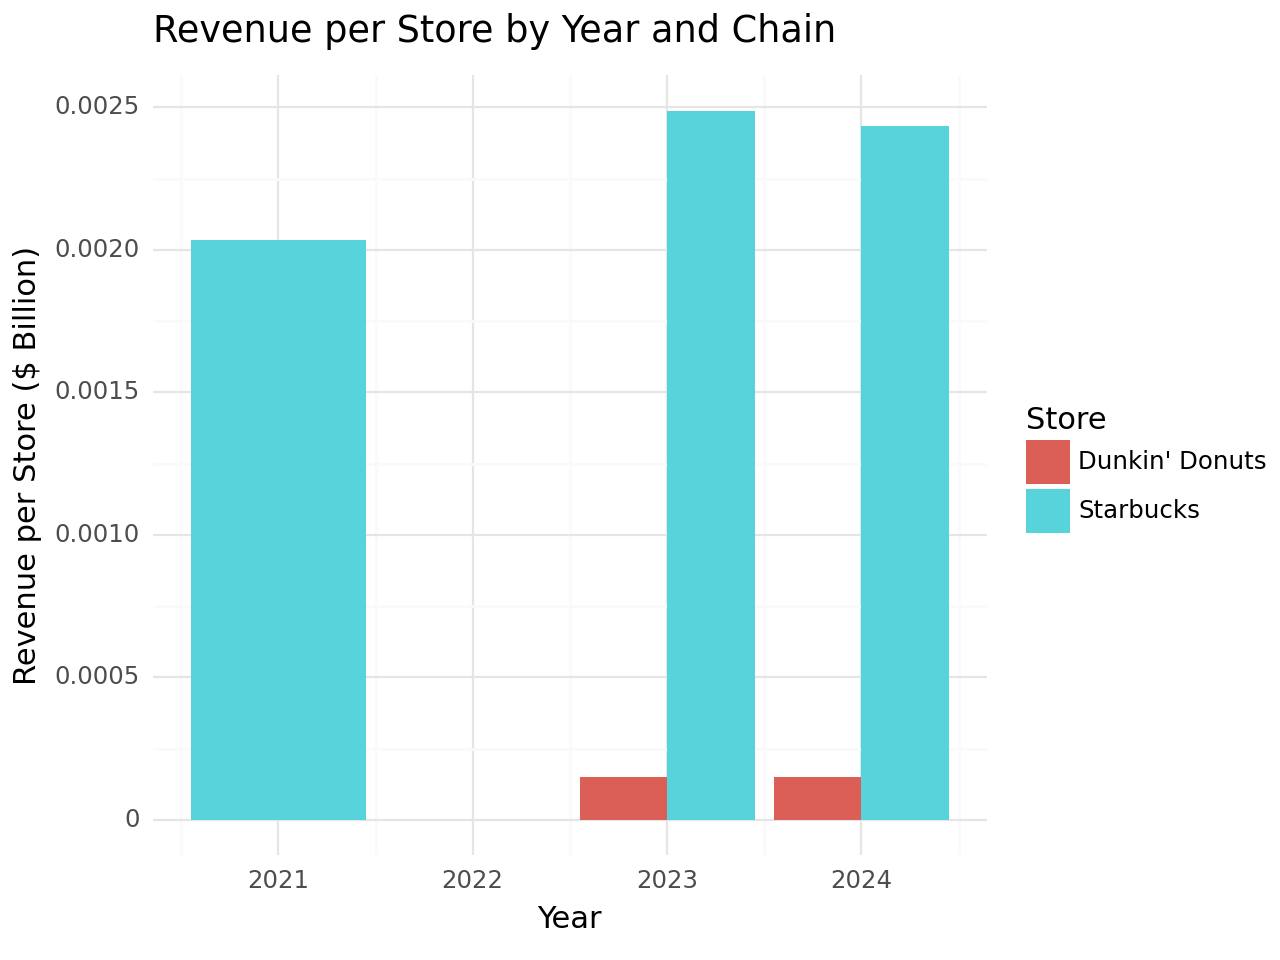

<Figure Size: (640 x 480)>

In [97]:
# Plot for Revenue per Store by Year and Store
(ggplot(store_revenues, aes(x='Year', y='Revenue_per_Store', fill='Store')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title="Revenue per Store by Year and Chain",
         x="Year", y="Revenue per Store ($ Billion)") +
    theme_minimal()
)

In 2021, Starbucks operated 14,912 stores and generated a total revenue of 30.36 billion, resulting in a revenue per store of approximately 2,036,000. This suggests that each Starbucks store on average brought in a little over $2 million in revenue, showcasing strong performance and high demand.

In 2023, Starbucks expanded to 14,744 stores, and its revenue increased to 36.68 billion, translating to a revenue per store of about 2,488,000. Dunkin' Donuts, in comparison, operated 9,361 stores in 2023 and achieved a total revenue of 1.4 billion. This gives Dunkin' a revenue per store of approximately 150,000. The stark difference in revenue per store between Starbucks and Dunkin' illustrates how Starbucks' stores generate significantly higher revenue per location. This disparity likely reflects Starbucks' higher pricing, broader product range, and potentially larger average transaction value.

By 2024, both chains saw further growth in their store counts. Starbucks increased its locations to 14,989 stores, with a total revenue of 36.47 billion, yielding a revenue per store of around 2,433,000. Although this is a slight decrease from 2023, it remains substantially higher than Dunkin's average revenue per store. Dunkin' expanded to 9,666 stores in 2024, with a total revenue of 1.456 billion, resulting in a revenue per store of about $151,000—only a modest increase from the previous year.

The plot showcases the clear contrast in revenue per store between Starbucks and Dunkin' Donuts across the years 2021, 2023, and 2024. Starbucks consistently outperforms Dunkin' Donuts, generating significantly higher revenue per location. For instance, in 2024, Starbucks achieves approximately 2.4 million in revenue per store, while Dunkin' Donuts only generates around $150,000 per store. This gap highlights a key difference in their business models—Starbucks appears to prioritize a higher revenue per location, likely leveraging premium pricing and customer loyalty, whereas Dunkin' Donuts may focus more on affordability and high store density to attract frequent, low-cost visits.

## Automate
---

Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should

- Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

- Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

- Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.

In [98]:
def scrape_store_data(url):
    """
    Scrapes store data from the given URL, dynamically identifying available years from the table headers.
    
    Parameters:
        url (str): URL of the page to scrape.
        
    Returns:
        pd.DataFrame: DataFrame containing the scraped data.
    """
    # Fetch the page content
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Locate the table
    table = soup.find("table", {"class": "wpr-table"})
    
    # Extract years from the table headers
    headers = table.find("thead").find_all("th")[1:]  # Skip the first header, which is "State"
    years = [header.get_text(strip=True).split()[-1] for header in headers]  # Extract year from header text
    
    rows = []  # To store each row's data
    
    # Loop through each row in the table's tbody
    for row in table.find("tbody").find_all("tr"):
        state_name = row.find("th").get_text(strip=True)
        columns = row.find_all("td")
        
        # Collect store counts for the identified years
        row_data = [state_name]  # Start with the state name
        for i in range(len(years)):
            # Add store data if column exists, otherwise append None
            store_count = int(columns[i].get_text(strip=True).replace(",", "")) if i < len(columns) and columns[i].get_text(strip=True) else None
            row_data.append(store_count)
        
        rows.append(row_data)

    # Define column names: "State" +  years
    column_names = ["State"] + years
    
    # Convert to DataFrame
    df = pd.DataFrame(rows, columns=column_names)
    
    # Melt the data to get a tidy DataFrame with "Year" and "Store_Count" as columns
    tidy_df = df.melt(id_vars=["State"], var_name="Year", value_name="Store_Count")
    
    # Extract the company name from the URL as the last part of the path
    company_name = url.split('/')[-1].replace('-', ' ').title()
    company_name = company_name.replace("By State", "")
    
    # Add a column for the company name
    tidy_df["Store"] = company_name
    
    # Convert "Year" to numeric https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
    tidy_df["Year"] = pd.to_numeric(tidy_df["Year"], errors='coerce')
    
    return tidy_df

#### Does it work for Chick-Fil-A?
https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state


In [99]:
url = "https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state"

In [100]:
scraped_data = scrape_store_data(url)
scraped_data

,State,Year,Store_Count,Store
0,Texas,2024,489.0,Chick Fil A
1,Florida,2024,334.0,Chick Fil A
2,Georgia,2024,327.0,Chick Fil A
3,California,2024,243.0,Chick Fil A
4,North Carolina,2024,174.0,Chick Fil A
...,...,...,...,...
97,Maine,2023,2.0,Chick Fil A
98,Rhode Island,2023,2.0,Chick Fil A
99,Wyoming,2023,1.0,Chick Fil A
100,Alaska,2023,NaN,Chick Fil A
